## 8장 노트정리

이 파일은 8장을 학습하면서 실행한 내용을 정리한 것이다.

날짜 : 2025.9.30

작성자 : 김경연 (202311383)

### 예외
: 프로그램 실행 도중에 오류가 발생하면 생성되는 특별한 객체

: 예외가발생하면파이썬은프로그램실행을중단한다.

: 예외처리란 예외가 발생했을 때 프로그램 실행을 중단하지 않고 처리하는 방법을 정의한 프로그램 부분

<예외의 종류>
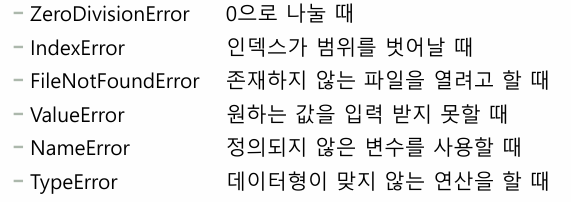

In [1]:
5/0

ZeroDivisionError: division by zero

In [3]:
a=[0,1,2]
a[3]

IndexError: list index out of range

In [4]:
fp=open("Nofile.txt","r")

FileNotFoundError: [Errno 2] No such file or directory: 'Nofile.txt'

In [6]:
int(input('Type float number or string : '))
Type float number or string : 1.23

SyntaxError: invalid syntax (1882196653.py, line 2)

In [7]:
1 + var*2

NameError: name 'var' is not defined

In [8]:
"str"+1

TypeError: can only concatenate str (not "int") to str

### 예외처리(1)

In [31]:
# try-except/try-except-else 문

try:
    b = int(input("나눌 값을 입력하세요: "))
    a = 1 / b
except ZeroDivisionError:
    print("0으로 나눌 수 없습니다")
else:
    print("결과:", a)

0으로 나눌 수 없습니다


In [30]:
# 예외를 알 수 없는 경우 try-except-else 문

try:
    a = int(input("Type a Number: "))
except Exception as e:
    print("예외가 발생했습니다:", e)
else:
    print(a)

5


In [28]:
# 복합try-except 문

import sys

try:
    fp = open('sample.txt')
    sl = fp.readline()
    value = int(sl.strip())

except OSError as err:
    print("OS 오류:", err)

except ValueError:
    print("정수로 변환할 수 없습니다")

except Exception as e:  # 모든 기타 예외 처리
    print("알 수 없는 오류가 발생하였습니다:", e)

OS 오류: [Errno 2] No such file or directory: 'sample.txt'


In [ ]:
# 예외처리(2)

try:
    result = x / y
except ZeroDivisionError:
    print("0으로 나눌 수 없습니다")
except: 
    print(result)
finally:
    print("예외처리가 끝났습니다")

### 사용자 예외 클래스

-사용자 예외 클래스는 Exception 클래스에서 상속받아 정의

-__str__ 함수를 작성하면 예외 내용을 문자열로 출력 가능

-__init__ 함수를 작성하면 예외를 발생시킬 때 값을 전달할 수 있음

In [13]:
class NegativeNumberError(Exception):
    def __init__(self, value):
        self.value = value
        self.message = f"음수는허용되지않습니다: 입력값({value})"
        super().__init__(self.message)
 
    def __str__(self):
        return self.message

def process_number(n):
    if n < 0:
        raise NegativeNumberError(n)
    return n * 2

try:
    num = int(input("양의정수를입력하세요: "))
    result = process_number(num)
except ValueError:
    print("숫자가아닌값을입력했습니다.")
except NegativeNumberError as e:
    print(f"사용자정의예외발생: {e}")
else:
    print(f"처리결과: {result}")
finally:
    print("프로그램종료.")


처리결과: 10
프로그램종료.


# 파이썬의 파일 처리 -----------------

### 파일 입출력

#### 표준 입출력
-표준입력(standard input) : 키보드

-표준출력(standard output) : 콘솔 화면

-표준에러(standard error) : 콘솔 화면

### 파일 입출력

-표준입출력대신에파일에기록하는것

-텍스트(text) 파일 : 사람이 볼 수 있는 문자 데이터를 저장(메모장으로확인가능)

-이진(binary) 파일: 이진수 데이터를 저장

### 파일 처리 과정

-열기: 파일 이름과 처리목적(읽기또는쓰기)를 지정해 사용하려는 파일을 열기

-사용: 열린 파일에 대한 읽기 또는 쓰기를 진행

-닫기: 파일의 사용이 끝나면 열린 파일을 닫아 버퍼에 있는 내용을 디스크에 모두 반영

### 파일 다루기

-파일의 개념적 모델
 : 오프셋 0부터 끝까지 1Byte 단위로 직렬화되어 저장됨

-파일의 열기
: fp = open(“filename”, “mode”)

-Filename : 열고자 하는 파일명 (절대경로 혹은 상대경로로 지정) 

-mode : r, w, a, x / r+, w+, a+ / rb, wb, ab, rb+, wb+, ab

#### 텍스트 파일

파일의 열기 모드 (텍스트 파일)

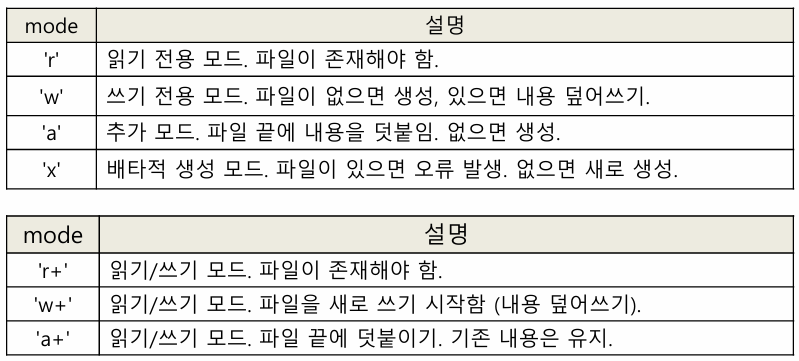

#### 쓰기

현재폴더(실행중인폴더)에phonebook.txt 파일을 쓰기 모드로 열고 유니코드의 인코딩 방식은 utf-8 형식으로 저장하라

In [27]:
ofile = open("./phonebook.txt", "w", encoding="utf-8")

ofile.write("John Doe, 123-456-7890\nJane Smith, 987-654-3210\n")
ofile.write("Alice Johnson, 555-123-4567\nBob Brown, 444-987-6543\n")
ofile.write("Charlie Davis, 333-222-1111\n")
ofile.write("Eve White, 777-888-9999\n")

ofile.close()

#### 읽기

In [26]:
rfile = open("./phonebook.txt", "r", encoding="utf-8")

line: str = rfile.readline()
while line:
    print(line.strip())
    line = rfile.readline()

rfile.close()


rfile = open("./phonebook.txt", "r", encoding="utf-8")

lines: list = rfile.readlines()
for line in lines:
    print(line.strip())

rfile.close()


John Doe, 123-456-7890
Jane Smith, 987-654-3210
Alice Johnson, 555-123-4567
Bob Brown, 444-987-6543
Charlie Davis, 333-222-1111
Eve White, 777-888-9999
John Doe, 123-456-7890
Jane Smith, 987-654-3210
Alice Johnson, 555-123-4567
Bob Brown, 444-987-6543
Charlie Davis, 333-222-1111
Eve White, 777-888-9999


#### 읽기 예외 처리

In [25]:
try:
    rfile = open("./phonebook1.txt", "r", encoding="utf-8")
    line: str = rfile.readline()
    while line:
        print(line.strip())
        line = rfile.readline()
    rfile.close()
except FileNotFoundError as e:
    print("File not found:", e)

File not found: [Errno 2] No such file or directory: './phonebook1.txt'


#### 한번에 하는 방법 (with ~ as)

In [24]:
contacts: dict = {
    '123-456-7890': 'John Doe',
    '987-654-3210': 'Jane Smith',
    '555-123-4567': 'Alice Johnson',
    '444-987-6543': 'Bob Brown',
    '333-222-1111': 'Charlie Davis',
    '777-888-9999': 'Eve White'
}

with open("./phonebook.txt", "w", encoding="utf-8") as wfile:
    for key, value in contacts.items():
        wfile.write(f"{value}, {key}\n")

with open("./phonebook.txt", "r", encoding="utf-8") as rfile:
    line: str = rfile.readline()
    while line:
        name, phone = line.strip().split(", ")
        print(f"Name: {name}, Phone: {phone}")
        line = rfile.readline()

print("-" * 40)

with open("./phonebook.txt", "r", encoding="utf-8") as rfile:
    for line in rfile:
        name, phone = line.strip().split(", ")
        print(f"Name: {name.strip()}, Phone: {phone.strip()}")


Name: John Doe, Phone: 123-456-7890
Name: Jane Smith, Phone: 987-654-3210
Name: Alice Johnson, Phone: 555-123-4567
Name: Bob Brown, Phone: 444-987-6543
Name: Charlie Davis, Phone: 333-222-1111
Name: Eve White, Phone: 777-888-9999
----------------------------------------
Name: John Doe, Phone: 123-456-7890
Name: Jane Smith, Phone: 987-654-3210
Name: Alice Johnson, Phone: 555-123-4567
Name: Bob Brown, Phone: 444-987-6543
Name: Charlie Davis, Phone: 333-222-1111
Name: Eve White, Phone: 777-888-9999


#### 추가하기

In [23]:
file = open("./phonebook.txt", "a", encoding="utf-8")
file.write("홍길동, 123-456-7890\n김정렬, 987-654-3210\n")

file.close()

#### 이진 파일 다루기

이진 파일의 열기 모드
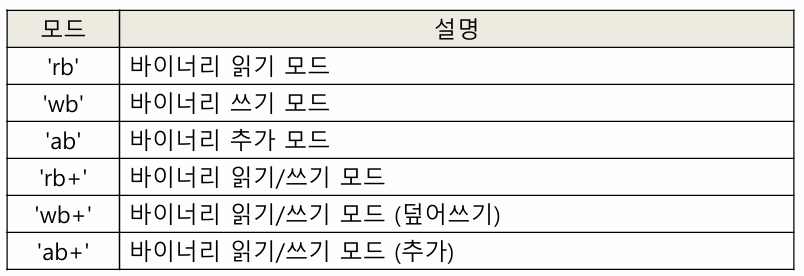

#### 이진 파일의 처리
-이미지, 음악, 영상 파일들은 텍스트 파일이 아니어서 메모장으로 읽을 수 없음(문자깨짐)

-이진 파일의 읽고 쓰기

-유니코드 문자열 >> 바이트 변환

-바이트 >> 유니코드 변환



In [19]:
#### 이진 파일 다루기 예제 : 고정길이 전화번호부 (연락처 클래스 선언)

class ContactRecord:
    def __init__(self, phone: str, name: str, age: int = None):
        self.phone = phone
        self.name = name
        self.age = age if age is not None else 0
    def __str__(self) -> str:
        return f"전화번호: {self.phone}, 이름: {self.name}, 나이: {self.age}"

# 테스트용연락처데이터
contacts = [
    ContactRecord("010-1234-5678", "홍길동", 25),
    ContactRecord("010-2345-6789", "김철수", 30),
    ContactRecord("010-3456-7890", "이영희", 28),
    ContactRecord("010-4567-8901", "박민수", 35)
]

In [22]:
#### 이진 파일 다루기 예제 : 레코드 바이트 패킹/언패킹 함수 정의

import struct

class ContactRecord:
    def __init__(self, phone: str, name: str, age: int):
        self.phone = phone
        self.name = name
        self.age = age

def pack_contact_record(contact: ContactRecord) -> bytes:
    phone_bytes = contact.phone.encode('utf-8')[:16].ljust(16, b'\x00')
    name_bytes = contact.name.encode('utf-8')[:16].ljust(16, b'\x00')

    return struct.pack("16s16si", phone_bytes, name_bytes, contact.age)


def unpack_contact_record(record: bytes) -> ContactRecord:
    phone_bytes, name_bytes, age = struct.unpack("16s16si", record)

    phone = phone_bytes.rstrip(b'\x00').decode('utf-8', errors='ignore')
    name = name_bytes.rstrip(b'\x00').decode('utf-8', errors='ignore')
    
    return ContactRecord(phone, name, age)


#### 참고 : struct 모듈

In [32]:
import struct
data = struct.pack('i f 3s', 123, 45.67, b'abc')

# 언패킹 예제 (바이트를 다시 원래 값으로 변환)
num, flt, string = struct.unpack('i f 3s', data)

print(num)      # 123
print(flt)      # 45.67
print(string)   # b'abc'

# 크기 계산
size = struct.calcsize('i f 3s')
print(size)     # 포맷의 전체 바이트 크기

# 이름과 나이를 32바이트 레코드로 저장
name = "홍길동"
age = 25
record = struct.pack('20s i', name.encode('utf-8'), age)

# 네트워크로 전송할 패킷 생성
header = struct.pack('!IH', 0x1234, 80)
print(header)


123
45.66999816894531
b'abc'
11
b'\x00\x00\x124\x00P'


#### 이진 파일 다루기 예제 : 전화번호부 읽고 쓰기

In [42]:
from dataclasses import dataclass
import struct, os

@dataclass
class ContactRecord:
    phone: str
    name: str
    age: int

def pack_contact_record(contact: ContactRecord) -> bytes:
    phone_bytes = contact.phone.encode('utf-8')[:16].ljust(16, b'\x00')
    name_bytes = contact.name.encode('utf-8')[:16].ljust(16, b'\x00')
    return struct.pack("16s16si", phone_bytes, name_bytes, contact.age)

def unpack_contact_record(record: bytes) -> ContactRecord:
    phone_bytes, name_bytes, age = struct.unpack("16s16si", record)
    phone = phone_bytes.rstrip(b'\x00').decode('utf-8', errors='ignore')
    name  = name_bytes.rstrip(b'\x00').decode('utf-8', errors='ignore')
    return ContactRecord(phone, name, age)

contacts = [
    ContactRecord("010-1111-2222", "홍길동", 25),
    ContactRecord("010-3333-4444", "이순신", 30),
    ContactRecord("010-5555-6666", "유관순", 28),
]

In [43]:
print("36바이트 레코드로 저장:")
with open("./contacts_struct.bin", "wb") as file:
    for contact in contacts:
        # pack_contact_record 함수를 사용하여 레코드 생성
        record = pack_contact_record(contact)
        file.write(record)
        print(f" 저장: {contact}")

print("\n36바이트 레코드 읽기:")
with open("./contacts_struct.bin", "rb") as file:
    record_num = 1
    while True:
        record = file.read(36)  # 36바이트씩 읽기(16+16+4)
        if not record or len(record) < 36:
            break

        # unpack_contact_record 함수를 사용하여 레코드 해석
        contact = unpack_contact_record(record)
        print(f" 레코드{record_num}: {contact}")
        record_num += 1

print("\n파일 크기 확인:")
import os
if os.path.exists("./contacts_struct.bin"):
    size = os.path.getsize("./contacts_struct.bin")
    records = size // 36
    print(f"contacts_struct.bin: {size}바이트 ({records}개 레코드)")


36바이트 레코드로 저장:
 저장: ContactRecord(phone='010-1111-2222', name='홍길동', age=25)
 저장: ContactRecord(phone='010-3333-4444', name='이순신', age=30)
 저장: ContactRecord(phone='010-5555-6666', name='유관순', age=28)

36바이트 레코드 읽기:
 레코드1: ContactRecord(phone='010-1111-2222', name='홍길동', age=25)
 레코드2: ContactRecord(phone='010-3333-4444', name='이순신', age=30)
 레코드3: ContactRecord(phone='010-5555-6666', name='유관순', age=28)

파일 크기 확인:
contacts_struct.bin: 108바이트 (3개 레코드)


#### 파일의 임의 접근

-특정위치(오프셋)로 가서 데이터를 읽거나 써야할 필요가 있을 때 사용

-특히 고정길이 파일 구조의 특정 레코드를 임의로 접근

-순차적이 아닌 임의 접근하므로 모든 레코드가 아닌 해당 레코드만 변경 가능

-함수: f.seek(offset, from)

-함수: f.tell()

#### 이진 파일 다루기 예제 : 전화번호부 검색하여 수정

In [48]:
def update_contact_in_binary_file(filename: str, target_phone: str, new_name: str, new_age: int) -> bool:
    """이진 파일에서 특정 전화번호의 연락처 정보 수정"""
    try:
        with open(filename, "r+b") as file:
            record_num = 0
            while True:
                position = file.tell() 
                record = file.read(36)

                if not record or len(record) < 36:
                    break

                record_num += 1
                contact = unpack_contact_record(record)

                if contact.phone == target_phone:
                    new_contact = ContactRecord(target_phone, new_name, new_age)
                    new_record = pack_contact_record(new_contact)

                    file.seek(position)
                    file.write(new_record)
                    print(f"레코드 {record_num} 수정 완료:")
                    print(f"이전: {contact}")
                    print(f"이후: {new_contact}")
                    return True

        print(f"전화번호 '{target_phone}'을(를) 찾을 수 없습니다.")
        return False

    except FileNotFoundError:
        print(f"파일 {filename}을(를) 찾을 수 없습니다.")
        return False


#### with ~as 구문

<문법>

##### -with 표현식 as 변수:    

##### -코드블록
  
  표현식: 컨텍스트 관리자를 반환하는 객체
  
  as 변수는 : 그 객체의 리턴값을 변수에할당-코드블록이끝나면자동으로자원정리(__exit__) 가 호출

In [49]:
with open("data.txt", "r") as f:
 content = f.read()
 print(content)

FileNotFoundError: [Errno 2] No such file or directory: 'data.txt'

#### with~as 구문 : 사용자 정의 표현식(사용자 정의 Context 클래스)

##### <문법>

-with 표현식 as 변수:    

-코드블록

##### <사용자 정의 컨텍스트 클래스 정의 예제>

-사용자정의컨-MyContext : __enter__ 와 __exit__ 함수를 다음과 같이 정의

-with MyContext as obj : MyContext 객체를 만든 후 __enter__를 실행하고 객체 반환

-코드블록이 끝나면__exit__ 함수 수행

In [50]:
class MyContext:
    def __enter__(self):
        print("자원 획득")
        return "작업 시작"
    def __exit__(self, exc_type, exc_value, traceback):
        print("자원 해제")

with MyContext() as msg:
    print(msg)

자원 획득
작업 시작
자원 해제


#### with~as 구문 : Context 클래스 contextmanager 사용

#### <사용자 정의 컨텍스트 클래스 정의 예제>
-@contextmanager 데코레이터 사용

-yield: __enter__를 실행하는 것과 동일

-finally: __exit__ 함수 수행

In [51]:
from contextlib import contextmanager

@contextmanager
def open_file(name, mode):
    f = open(name, mode)
    try:
        yield f
    finally:
        f.close()

In [52]:
 # 사용 예
with open_file("data.txt", "w+") as file:
    file.write("Hello, World!\n")
    file.seek(0)
    content = file.read()
    print(content)

Hello, World!



## F-string--------------------------------

#### F-String(formatted string)
변수나 표현식으로 내용을 변경할 수 있는 포맷 문자열f' {}'

In [60]:
from datetime import datetime
n=10
date=datetime(1988, 8, 16, 21, 30)
print(f'{n:|^20}') # '0000000010'
date=datetime(1988, 8, 16, 21, 30)
now=datetime.now()
num = 123.456
number = 255
m=20000
a=True

print(f'양수부호표시{n:+}')
print(f'날짜{date:%c}') # 'Tue Aug 16 21:30:00 1988'
print(f'날짜{now:%Y년%m월%d일%H시%M분%S초}')
print(f'{bool(a) = }') # 'bool(a) = True'
print(f'소수점아래2자리{n:_.2f}')
print(f'왼쪽정렬{m:<10,}')
print(f'수식결과{3+4= }')
print(f'우측정렬{m:0>10}')
print(f'중앙정렬과쉼표표기{m:^20,}')
print(f"0으로패딩: '{num:010.2f}'")
print(f"십진수: {number}")
print(f"이진수: {number:b}")
print(f"이진수(0b 접두사): {number:#b}")
print(f"팔진수: {number:o}")
print(f"팔진수(0o 접두사): {number:#o}")
print(f"십육진수: {number:x}")
print(f"십육진수(대문자): {number:X}")
print(f"십육진수(0x 접두사): {number:#x}")
print(f"십육진수(대문자, 0X 접두사): {number:#X}")

|||||||||10|||||||||
양수부호표시+10
날짜Tue Aug 16 21:30:00 1988
날짜2025년10월14일06시41분29초
bool(a) = True
소수점아래2자리10.00
왼쪽정렬20,000    
수식결과3+4= 7
우측정렬0000020000
중앙정렬과쉼표표기       20,000       
0으로패딩: '0000123.46'
십진수: 255
이진수: 11111111
이진수(0b 접두사): 0b11111111
팔진수: 377
팔진수(0o 접두사): 0o377
십육진수: ff
십육진수(대문자): FF
십육진수(0x 접두사): 0xff
십육진수(대문자, 0X 접두사): 0XFF


#### 날짜와 시간

In [61]:
from datetime import datetime

now = datetime.now()
birthday = datetime(1995, 5, 15, 14, 30, 0)

print(f"현재시간: {now}")
print(f"기본포맷: {now:%Y-%m-%d %H:%M:%S}")
print(f"한국날짜형식: {now:%Y년%m월%d일}")
print(f"시간만: {now:%H:%M:%S}")
print(f"AM/PM 형식: {now:%Y-%m-%d %I:%M:%S %p}")
print(f"요일: {now:%A}")
print(f"월이름: {now:%B}")
print(f"ISO형식: {now:%Y-%m-%dT%H:%M:%S}")

print(f"\n생일: {birthday:%Y년%m월%d일%H시%M분}")

현재시간: 2025-10-14 06:42:53.302565
기본포맷: 2025-10-14 06:42:53
한국날짜형식: 2025년10월14일
시간만: 06:42:53
AM/PM 형식: 2025-10-14 06:42:53 AM
요일: Tuesday
월이름: October
ISO형식: 2025-10-14T06:42:53

생일: 1995년05월15일14시30분


#### 표현식과 함수 호출

In [62]:
import math
a=10
b=3
name= "python"

# 수학 연산
print(f"{a} + {b} = {a+ b}")
print(f"{a}-{b} = {a-b}")
print(f"{a} * {b} = {a* b}")
print(f"{a} / {b} = {a/ b:.2f}")
print(f"{a} ** {b} = {a** b}")
print(f"{a} % {b} = {a% b}")

# 함수 호출
print(f"sqrt({a}) = {math.sqrt(a):.2f}")
print(f"sin(π/2) = {math.sin(math.pi/2):.2f}")

# 문자열 메서드
print(f"대문자: {name.upper()}")
print(f"길이: {len(name)}")
print(f"첫글자: {name[0]}")

# 조건식
score= 85
print(f"성적: {score}점({'합격' if score >=60 else '불합격'})")


10 + 3 = 13
10-3 = 7
10 * 3 = 30
10 / 3 = 3.33
10 ** 3 = 1000
10 % 3 = 1
sqrt(10) = 3.16
sin(π/2) = 1.00
대문자: PYTHON
길이: 6
첫글자: p
성적: 85점(합격)


#### 문자열 정렬과 패딩

In [63]:
text = "Python"
width = 20

print("기본정렬:")
print(f"'{text:<{width}}'") # 왼쪽정렬
print(f"'{text:>{width}}'") # 오른쪽정렬
print(f"'{text:^{width}}'") # 가운데정렬

print("\n특수문자로패딩:")
print(f"'{text:-<{width}}'") # 왼쪽정렬, -패딩
print(f"'{text:*>{width}}'") # 오른쪽정렬, * 패딩
print(f"'{text:=^{width}}'") # 가운데정렬, = 패딩

print("\n숫자정렬:")
numbers = [1, 22, 333, 4444]
for num in numbers:
    print(f"'{num:>6}'") # 오른쪽정렬, 폭6

print("\n테이블형태:")
data = [
 ("이름", "나이", "점수"),
 ("김철수", 25, 85),
 ("이영희", 30, 92),
 ("박민수", 22, 78)
 ]

for row in data:
 print(f"{row[0]:<8} {row[1]:>3} {row[2]:>4}")


기본정렬:
'Python              '
'              Python'
'       Python       '

특수문자로패딩:
'Python--------------'
'**************Python'
'=======Python======='

숫자정렬:
'     1'
'    22'
'   333'
'  4444'

테이블형태:
이름        나이   점수
김철수       25   85
이영희       30   92
박민수       22   78


#### 중괄호 이스케이프와 특수 문자

In [64]:
name= "Python"

print(f"딕셔너리형태: {{'name': '{name}'}}") # 중괄호 출력하기(이중중괄호사용)
print(f"중괄호출력: {{변수}}")

file_path = r"C:\Users\Python\Documents" # 백슬래시와따옴표
quote= "She said, 'Hello!'"

print(f"파일경로: {file_path}") 
print(f'인용문: {quote}')

# 여러줄f-string
multi_line = f"""
이름: {name}
길이: {len(name)}
대문자: {name.upper()}
 """
print(multi_line)

# repr() 형태로출력(!r 사용)
debug_var= "hello\nworld"
print(f"일반출력: {debug_var}")
print(f"repr출력: {debug_var!r}")

# 디버깅용출력(Python 3.8+)
x=10
y=20
print(f"{x=}, {y=}")
print(f"{x + y=}")


딕셔너리형태: {'name': 'Python'}
중괄호출력: {변수}
파일경로: C:\Users\Python\Documents
인용문: She said, 'Hello!'

이름: Python
길이: 6
대문자: PYTHON
 
일반출력: hello
world
repr출력: 'hello\nworld'
x=10, y=20
x + y=30


#### 실용 예제 : 진행률 표시, 로그메시지

In [65]:
# 1. 진행률표시
def show_progress(current, total):
    percentage = (current/total) *100
    bar_length=20
    filled_length=int(bar_length*current/total)
    bar='█'*filled_length+'-'*(bar_length-filled_length)
    return f"\r진행률: |{bar}| {percentage:.1f}% ({current}/{total})"

for i in range(0, 101, 20):
    print(show_progress(i, 100))

print("\n"+"="*50)

# 2. 로그메시지포맷팅
import datetime

def log_message(level, message):
    timestamp=datetime.datetime.now()
    return f"[{timestamp:%Y-%m-%d %H:%M:%S}] {level:>5}| {message}"

print(log_message("INFO", "프로그램이시작되었습니다"))
print(log_message("ERROR", "파일을찾을수없습니다"))
print(log_message("DEBUG", "변수x의값: 42"))

print("\n"+"="*50)

진행률: |--------------------| 0.0% (0/100)
진행률: |████----------------| 20.0% (20/100)
진행률: |████████------------| 40.0% (40/100)
진행률: |████████████--------| 60.0% (60/100)
진행률: |████████████████----| 80.0% (80/100)
진행률: |████████████████████| 100.0% (100/100)

[2025-10-14 06:52:01]  INFO| 프로그램이시작되었습니다
[2025-10-14 06:52:01] ERROR| 파일을찾을수없습니다
[2025-10-14 06:52:01] DEBUG| 변수x의값: 42

